In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
import xgboost as xgb
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import shap
import seaborn as sns
from sklearn.decomposition import PCA
import seaborn as sns

C:\Users\shash\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: ylabel='Frequency'>

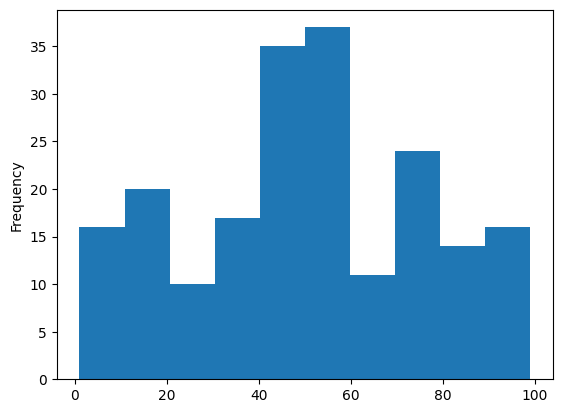

In [3]:
df["Spending Score (1-100)"].plot(kind="hist")

In [4]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [5]:
print(df.head())
print(df.tail())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [6]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df.drop(["CustomerID"],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [8]:
model=xgb.XGBRegressor(n_estimators=100,random_state=42,max_depth=5)

In [9]:
x=df[["Gender","Age","Annual Income (k$)"]]
y=df["Spending Score (1-100)"]
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=42)

In [10]:
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(mse(ypred,ytest))

537.4132690429688


In [11]:
scaler=StandardScaler()
xtrain_original=xtrain.copy()

#df["Gender"]=le.inverse_transform(df["Gender"])
#xtrain=scaler.fit_transform(xtrain)
#df=pd.get_dummies(df,columns=["Gender"])
df1=df.copy()

df1[["Spending Score (1-100)","Age","Annual Income (k$)"]]=scaler.fit_transform(df1[["Spending Score (1-100)","Age","Annual Income (k$)"]])






0.30319765641607577
0.31200836318195724
0.35044061449694197
0.34977050035201074
0.356485834425401
0.3315513749667554
0.336203797093241
0.3117853954011984


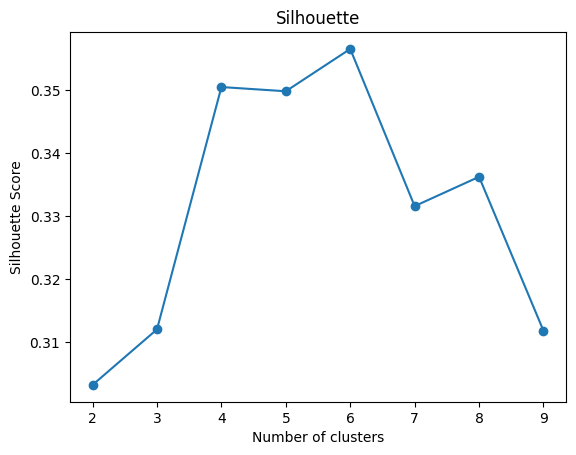

In [12]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    print(silhouette_score(df1, kmeans.labels_))
    scores.append(silhouette_score(df1, kmeans.labels_))

plt.plot(range(2, 10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

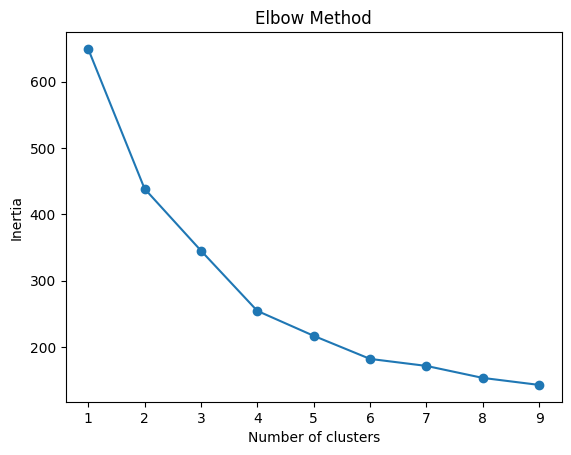

In [13]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [14]:
kmeans=KMeans(n_clusters=6,random_state=42)
kmeans.fit(df1)
df["cluster"]=kmeans.labels_
df1["cluster"]=kmeans.labels_

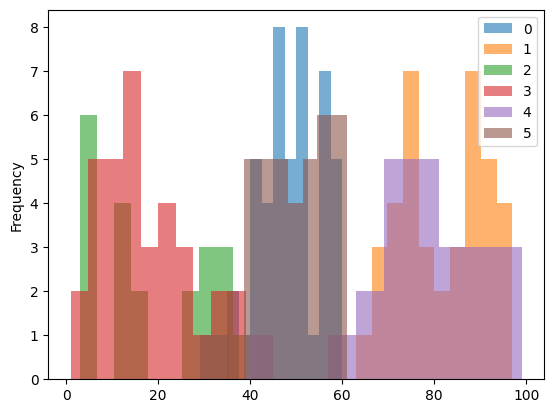

In [15]:
df[df["cluster"]==0]["Spending Score (1-100)"].plot(kind="hist",bins=10,label="0",alpha=0.6)
df[df["cluster"]==1]["Spending Score (1-100)"].plot(kind="hist",bins=10,label="1",alpha=0.6)
df[df["cluster"]==2]["Spending Score (1-100)"].plot(kind="hist",bins=10,label="2",alpha=0.6)
df[df["cluster"]==3]["Spending Score (1-100)"].plot(kind="hist",bins=10,label="3",alpha=0.6)
df[df["cluster"]==4]["Spending Score (1-100)"].plot(kind="hist",bins=10,label="4",alpha=0.6)
df[df["cluster"]==5]["Spending Score (1-100)"].plot(kind="hist",bins=10,label="5",alpha=0.6)
plt.legend()

<Axes: xlabel='cluster', ylabel='Spending Score (1-100)'>

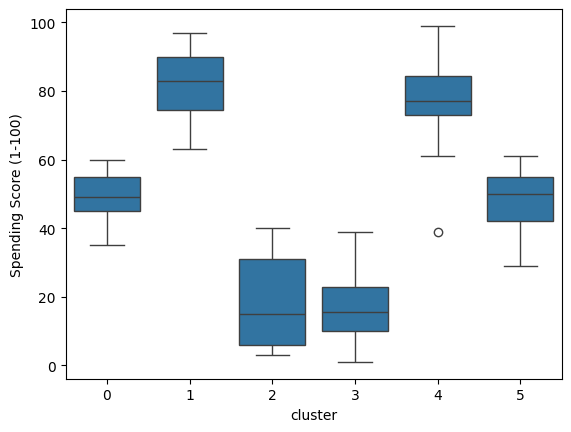

In [16]:
sns.boxplot(x="cluster", y="Spending Score (1-100)", data=df)

<Axes: xlabel='cluster', ylabel='Age'>

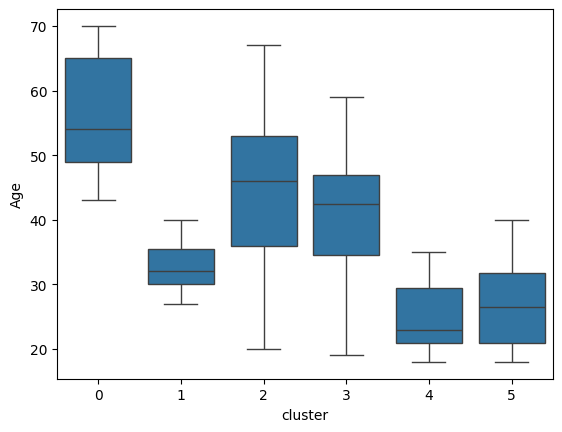

In [17]:
sns.boxplot(x="cluster", y="Age", data=df)

<Axes: xlabel='cluster', ylabel='Annual Income (k$)'>

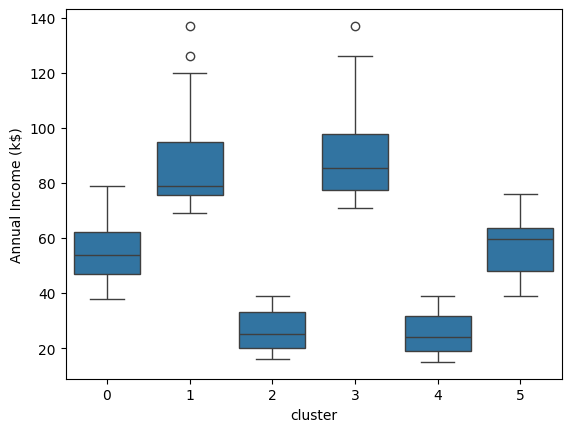

In [18]:
sns.boxplot(x="cluster", y="Annual Income (k$)", data=df)

In [19]:

print(silhouette_score(df1.drop(["cluster"],axis=1), kmeans.labels_))

0.356485834425401


<Axes: xlabel='pca1', ylabel='pca2'>

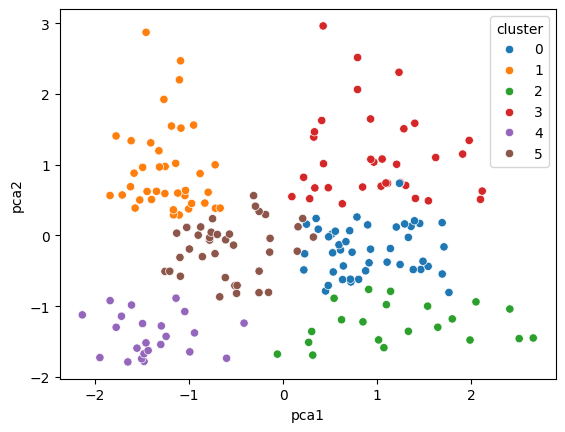

In [20]:


pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1.drop("cluster",axis=1))

df1['pca1'] = pca_result[:, 0]
df1['pca2'] = pca_result[:, 1]

sns.scatterplot(data=df1, x='pca1', y='pca2',hue="cluster", palette='tab10')

In [21]:
original_cluster_labels=df1["cluster"]
original_pca1=df1["pca1"]
original_pca2=df1["pca2"]
df1=df1.drop(["Spending Score (1-100)","pca1","pca2","cluster"],axis=1)

0.3197394882017734
0.3723496271989909
0.29203927860147055
0.30539072334212886
0.30222970725685233
0.29349724553138595
0.28980744901213923
0.3107357148268867


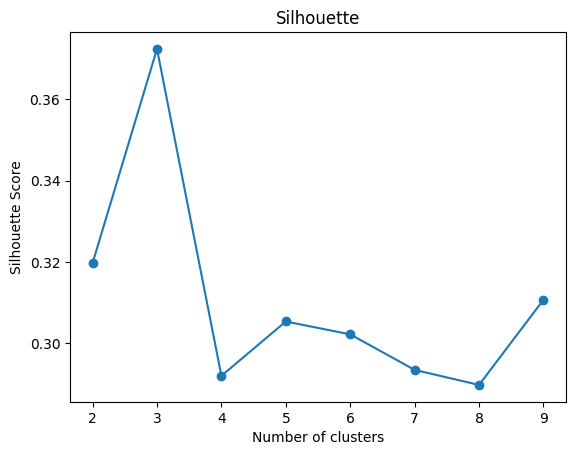

In [22]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    print(silhouette_score(df1, kmeans.labels_))
    scores.append(silhouette_score(df1, kmeans.labels_))

plt.plot(range(2, 10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette')
plt.show()

<Axes: xlabel='pca1', ylabel='pca2'>

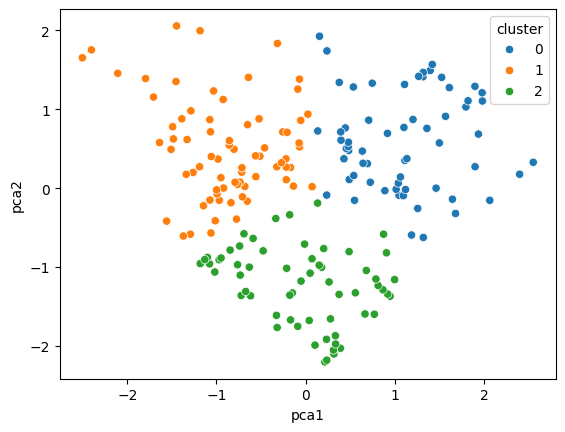

In [23]:




kmeans=KMeans(n_clusters=3,random_state=42)

labels=kmeans.fit_predict(df1)
#xtrain=scaler.inverse_transform(xtrain)
#print(xtrain)


df1['cluster'] = kmeans.labels_



pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1.drop("cluster",axis=1))

df1['pca1'] = pca_result[:, 0]
df1['pca2'] = pca_result[:, 1]

sns.scatterplot(data=df1, x='pca1', y='pca2',hue="cluster", palette='tab10')

In [24]:
print(silhouette_score(df1.drop(["cluster","pca1","pca2"],axis=1), df1["cluster"]))

0.3723496271989909


In [25]:
"""
df1["cluster"]=original_cluster_labels
df1["pca1"]=original_pca1
df1["pca2"]=original_pca2
"""



'\ndf1["cluster"]=original_cluster_labels\ndf1["pca1"]=original_pca1\ndf1["pca2"]=original_pca2\n'

In [26]:
model=xgb.XGBRegressor(n_estimators=100,random_state=42,max_depth=5)
df["cluster"]=original_cluster_labels
df["pca1"]=original_pca1
df["pca2"]=original_pca2
x=df[["pca1","pca2","Gender","Age","Annual Income (k$)"]]
y=df["Spending Score (1-100)"]

xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=42)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(mse(ypred,ytest))

32.527626037597656


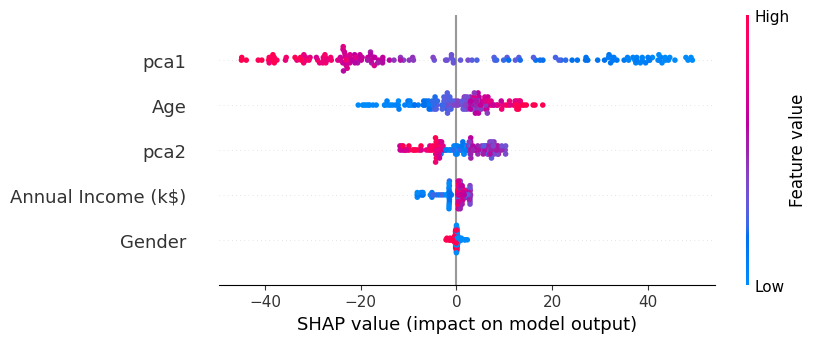

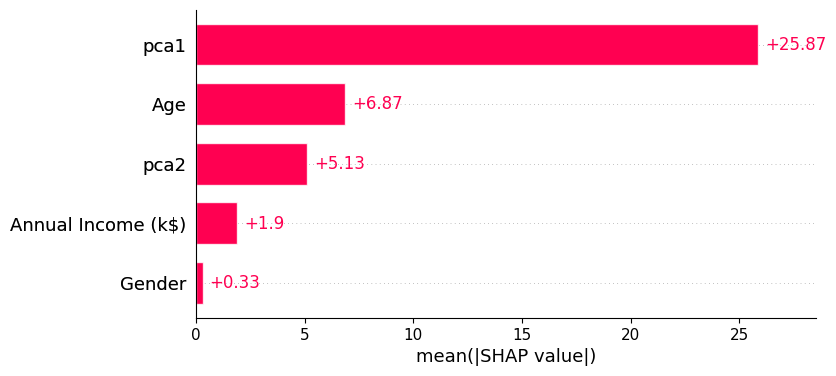

In [27]:
# 6. Create SHAP explainer
explainer = shap.Explainer(model, xtrain)  # or shap.TreeExplainer(model)

# 7. Compute SHAP values
shap_values = explainer(xtrain)

# 8. Plot SHAP summary (beeswarm)
shap.plots.beeswarm(shap_values)

# 9. Optional: Bar plot of mean feature importance
shap.plots.bar(shap_values)